In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

*Airlines Dataset*

In [2]:
Airline_d = pd.read_excel('C:/Users/Dell/Downloads/Airline_Dataset.xlsx')
Airline_d.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
Airline_d.rename(columns= {'ID#':'ID', 'Award?':'Award'}, inplace = True)

In [4]:
Airline_d.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
Airlines_Db = Airline_d.values

In [6]:
Airline_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
Airline_d.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
Air_corr = Airline_d.corr()

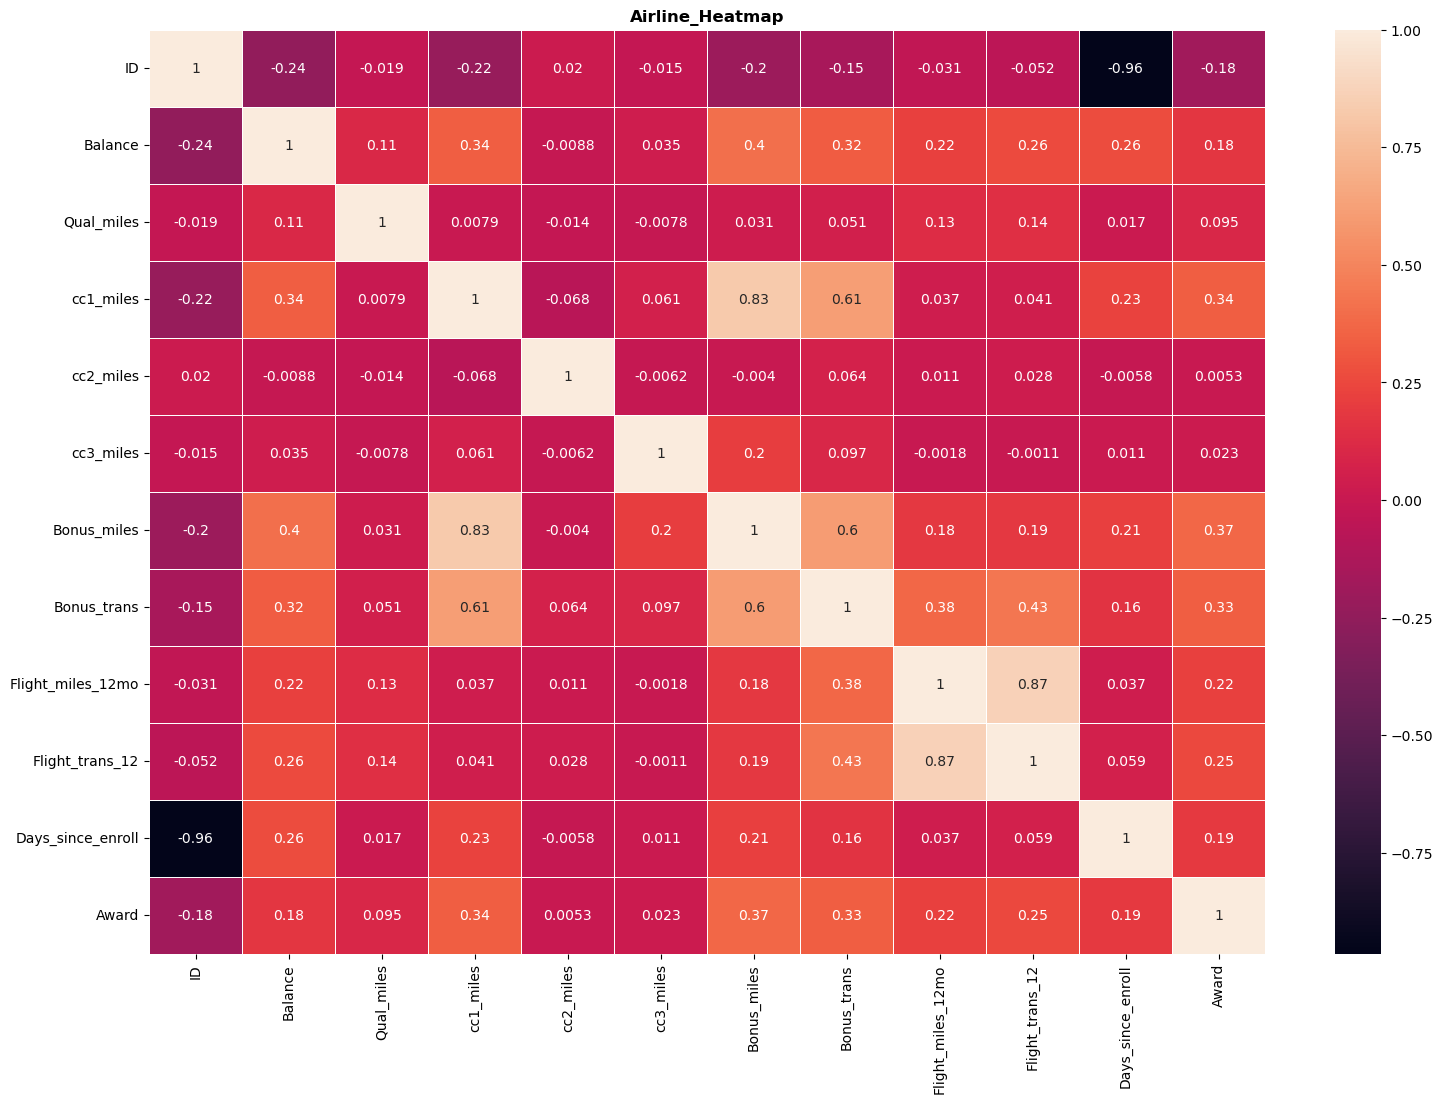

In [9]:
Airline_HM = plt.subplots(figsize=(18,12))
sns.heatmap(Airline_d.corr(), annot=True, linewidths =.5)
plt.title('Airline_Heatmap', fontweight = 'bold')
plt.show()

In [10]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(Airline_d)

In [11]:
minmax_Airline = MinMaxScaler()
minmax_df = minmax_Airline.fit_transform(Airline_d)

K-Means

In [12]:
cluster_range = range(1,15)
cluster_errors = []
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_Airline = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_Airline

,num_clusters,cluster_errors
0,1,47988.000000
1,2,39018.768571
2,3,34535.480927
3,4,30616.777022
4,5,26894.776730
5,6,23490.749029
6,7,21884.205140
7,8,19350.836193
8,9,17986.245561
9,10,16846.161847


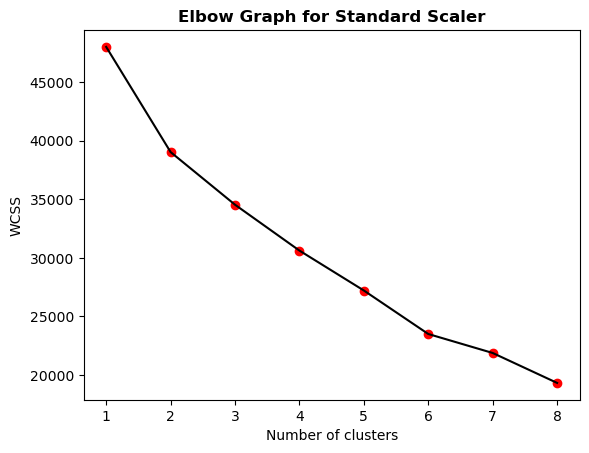

In [13]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler', fontweight = 'bold')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3999,)

In [15]:
Airline_new = pd.read_excel('C:/Users/Dell/Downloads/Airline_Dataset.xlsx')
Airline_new.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
Airline_new['Kmeans_label'] = model_kmeans.labels_

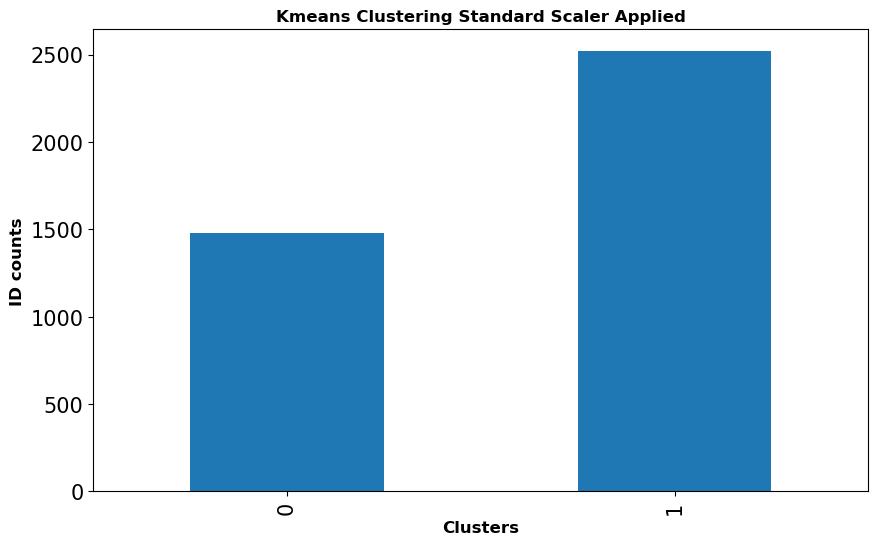

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
Airline_new.groupby(['Kmeans_label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [17]:
Airline_new.groupby('Kmeans_label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,
0,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0


Cluster1 : 1 defines the more frequent fliers
Cluster0 : 0 defines the less frequent fliers 

H-Clustering

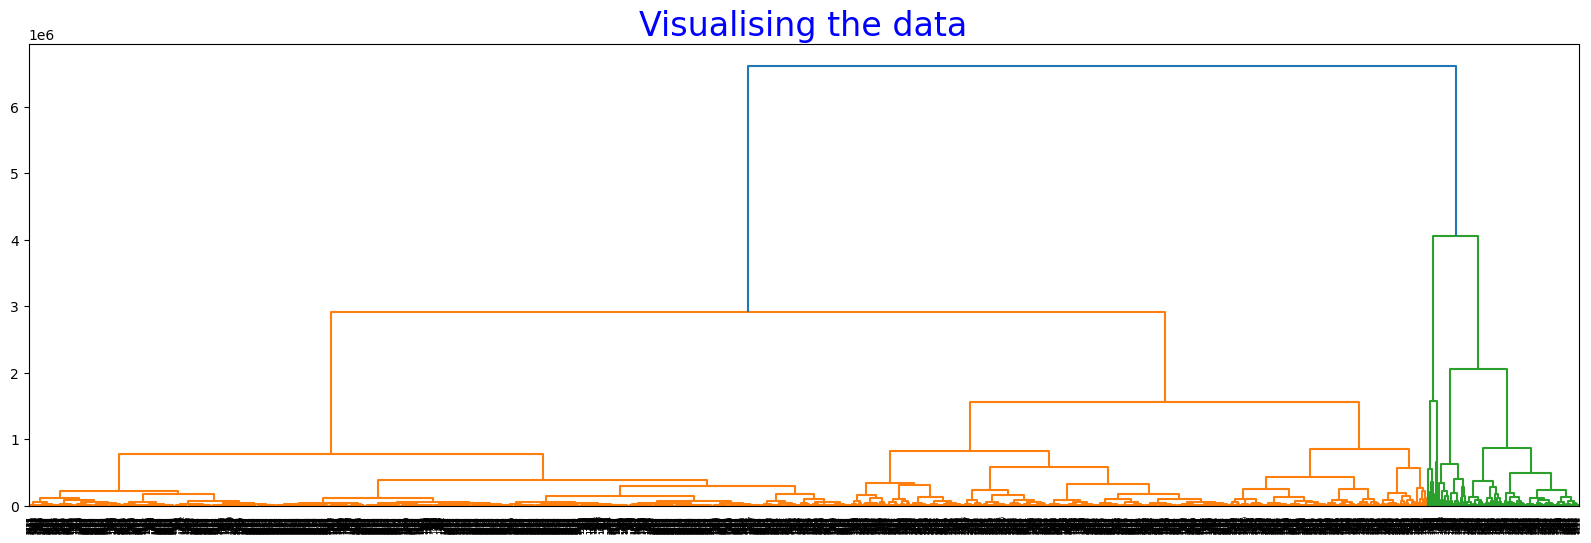

In [18]:
plt.figure(figsize =(20, 6))
dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
plt.title('Visualising the data',fontdict = dict)
dendrogram = sch.dendrogram(sch.linkage(Airline_d, method='ward'))

As you can see the height increases the clusters get grouped together, so will cut it to obtain minimum clusters.

In [19]:
from sklearn.metrics import silhouette_score as sil

In [20]:
n_clusters = [2,3,4,5]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4701970394742716

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3434542103874939

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.32621110074848614

For n_clusters = 5 The average silhouette_score with linkage- ward : 0.3712758705361222



DBSCAN

In [21]:
Airlines_Db

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [22]:
stscaler = StandardScaler().fit(Airlines_Db)
X1 = stscaler.transform(Airlines_Db)

In [23]:
dbscan_Airline = DBSCAN(eps=0.82, min_samples=6)
dbscan_Airline.fit(X1)

DBSCAN(eps=0.82, min_samples=6)

In [24]:
cl = pd.DataFrame(dbscan_Airline.labels_,columns=['Cluster'])
airlines_db_new = pd.concat([Airline_new,cl],axis=1)
airlines_db_new

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [25]:
airlines_db_new['Cluster'].value_counts()

 0    2182
 1     903
-1     879
 3      16
 4       7
 5       7
 2       5
Name: Cluster, dtype: int64

*Crime Dataset*

In [26]:
Crime_data = pd.read_csv('C:/Users/Dell/Downloads/crime_data.csv')
Crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [27]:
Crime_data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
Crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [28]:
Crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [29]:
Crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


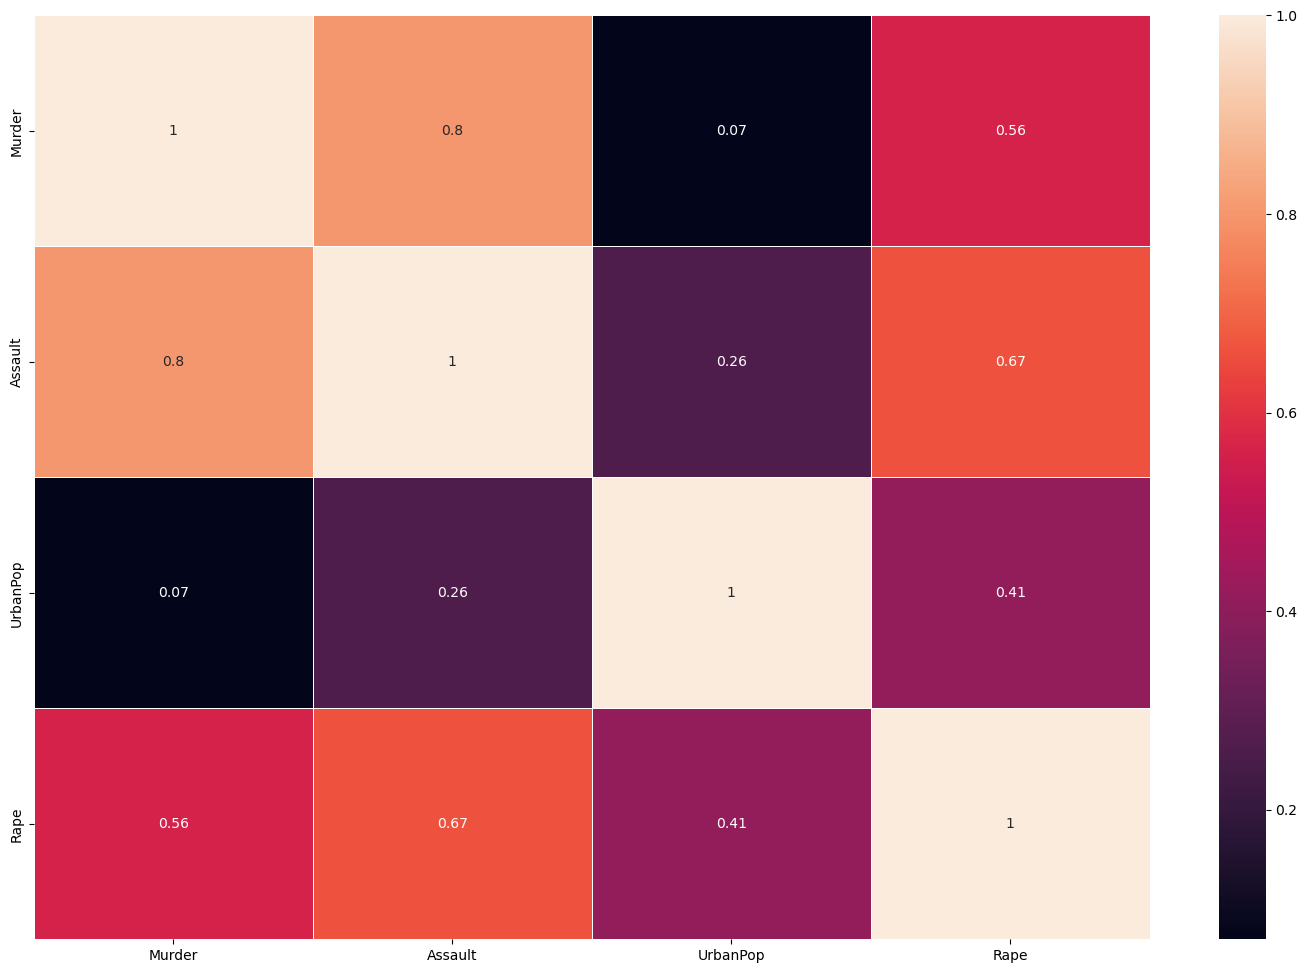

In [30]:
Crime_HM = plt.subplots(figsize=(18,12))
sns.heatmap(Crime_data.corr(), annot=True, linewidths =.5)
plt.show()

In [31]:
#standardizing the data
df_crime = Crime_data.set_index('States')
df_crime.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [32]:
standard_scaler = StandardScaler()
std_df_crime = standard_scaler.fit_transform(df_crime)
std_df_crime.shape

(50, 4)

In [33]:
#Normalizing the data
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df_crime)
minmax_df.shape

(50, 4)

K-Means Clustering

In [34]:
crime_cluster_range = range(1,15)
crime_cluster_errors = []
for crime_num_clusters in crime_cluster_range:
    clusters_crime = KMeans(crime_num_clusters,n_init=10)
    clusters_crime.fit(std_df_crime)
    labels = clusters_crime.labels_
    centroids = clusters_crime.cluster_centers_
    crime_cluster_errors.append(clusters_crime.inertia_)
clusters_df_crime = pd.DataFrame({"num_clusters":crime_cluster_range,"cluster_errors":crime_cluster_errors})
clusters_df_crime

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,50.797995
5,6,43.710052
6,7,39.159790
7,8,36.545310
8,9,31.478389
9,10,28.285786


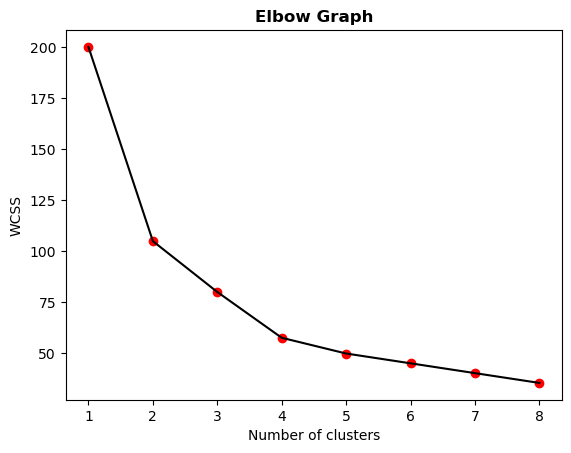

In [35]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters = i,random_state=2)
    kmeans.fit(std_df_crime)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph', fontweight = 'bold')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
clusters_list = [2,3,4,5,6]

for n_clusters in clusters_list:
    clusteres_crime_d = KMeans(n_clusters = n_clusters, random_state=0)
    cluster_labels1 = clusteres_crime_d.fit_predict(std_df_crime)
    sil_score = sil(std_df_crime, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946


As we can see the silhouette score is best for 3 clusters after that it decreases so we'll buid a kmeans model using k=3

In [37]:
crime_model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = crime_model_kmeans.fit_predict(std_df_crime)
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [38]:
crime_model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [42]:
df_crime['Kmeans_label'] = crime_model_kmeans.labels_
df_crime.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


Cluster0 can be described as a safer zone because it has Lower crime rate,
while Cluster1 can be sescribed as a danger zone as it has High crime rate.

H-Clustering

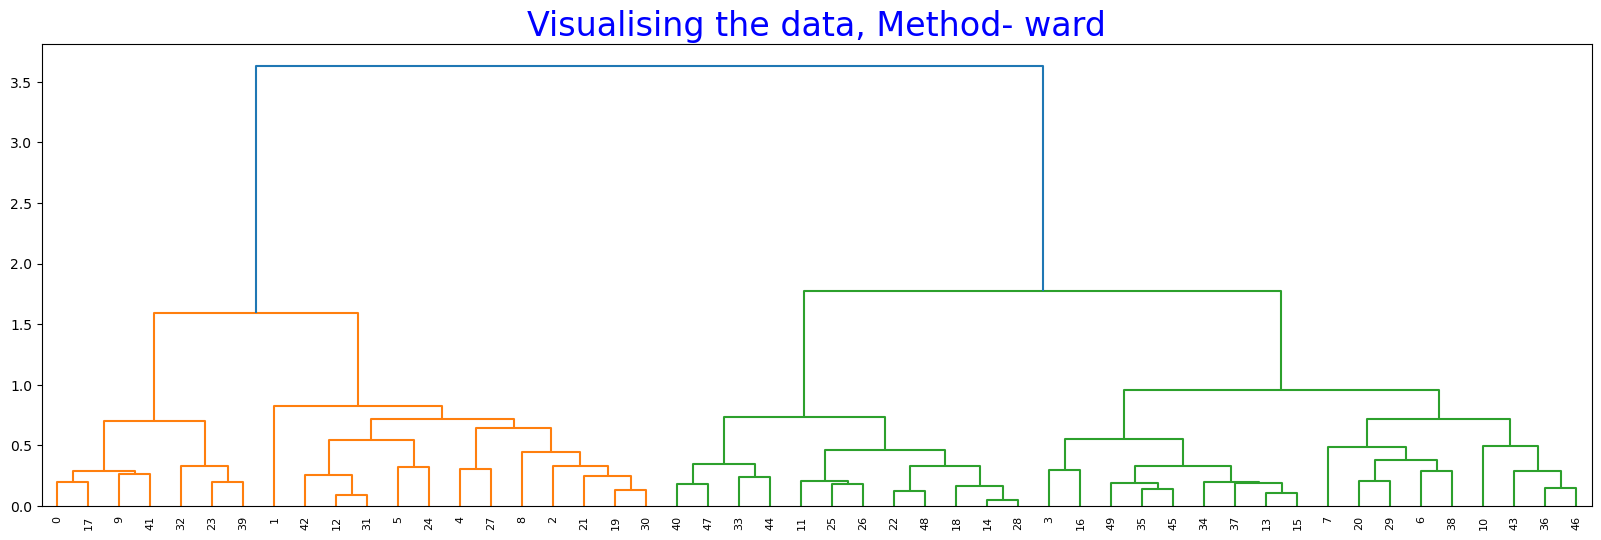

In [48]:
for methods in ['ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram_crime = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [50]:
n_clusters = [2,3,4,5,6,7,8]

for n_clusters in n_clusters:
    for linkages in ["ward"]:
        hier_cluster = AgglomerativeClustering(n_clusters = n_clusters,linkage = linkages)
        hier_labels = hier_cluster.fit_predict(minmax_df) 
        silhouette_score = sil(minmax_df, hier_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785

For n_clusters = 5 The average silhouette_score with linkage- ward : 0.28290124293256447

For n_clusters = 6 The average silhouette_score with linkage- ward : 0.28134198599501803

For n_clusters = 7 The average silhouette_score with linkage- ward : 0.26010746919769046

For n_clusters = 8 The average silhouette_score with linkage- ward : 0.23007745711627264



In [51]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
df_crime['Hierarchical_labels'] = agg_clustering.labels_
df_crime.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label
,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,
0,4.870,114.433333,63.633333,15.943333,1.133333
1,12.165,255.250000,68.400000,29.165000,1.050000


DBSCAN

In [52]:
dbscan = DBSCAN(eps=1.5, min_samples=1)
dbscan.fit(std_df_crime)

DBSCAN(eps=1.5, min_samples=1)

In [53]:
df_crime['DBSCAN_labels'] = dbscan.labels_
df_crime.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,2,0,0
California,9.0,276,91,40.6,1,1,0


In [54]:
df_crime.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,1.102041,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


Cluster0 can be described as a safer zone because it has Lower crime rate,
while Cluster1 can be sescribed as a danger zone as it has High crime rate.